In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

In [2]:
def SLR_Selection(X, Y, penalty, maximum_feature, solver, max_iter):
    
    '''
    1. Define Logistic Regression model with L1/L2 penalised term for feature selection
    2. Fit training data into the defined Logistic Regression.
    3. Check the indexes for the selected features and print relevant estimation from it.
    4. Draw the coeffcient against the name of selected feature
    5. Calculate the resulting probability mapped from exact value for coefficient value/Plot it.
    '''
    
    #Define the logistic regression model
    lr_selector = SelectFromModel(LogisticRegression(C = 1, penalty = penalty, solver = solver , max_iter = max_iter),
                                 max_features = maximum_feature) # max_features can be used to select asigned number of features.
    lr_selector.fit(X, Y)
    
    #lr_support = lr_selector.get_support() #Obtain the index list of True/False: If true, selected; if false, dropped.     
    lr_index = lr_selector.get_support(indices = True) #Translate the index into the corresponding feature names (column index).
    #lr_feature = X.iloc[:, lr_support].columns.tolist() #Same as above (list with comma).
    print(str(len(lr_index)), 'selected features')
    print('Column index for selected features', lr_index) #print the column index, which can be directly used for modelling.
    
    
    #Fit the final selected data into SLR model and obtain estimations.
    #X_copy = pd.DataFrame(X.copy())
    LR_fit = LogisticRegression(C = 1, penalty = penalty, solver = solver, max_iter = max_iter)
    fit = LR_fit.fit(X.iloc[:, lr_index], Y)
    
    #Estimations
    LR_coef = LR_fit.coef_
    LR_intercept = LR_fit.intercept_
    print('Coefficient List of Selected Features', LR_coef)
    print('Intercept = ', LR_intercept)
    
    #Plot the estimated coefficient.
    X_copy = X.copy()
    dset = pd.DataFrame()
    dset['attr'] = X_copy.columns[lr_index]
    dset['Coefficient'] = LR_coef.T #Transform array by replacing column/row by row/column.
    dset = dset.sort_values(by = 'Coefficient', ascending=False)

    plt.figure(figsize = (9, 12))
    plt.yticks(fontsize = 11)
    plt.barh(y = dset['attr'], width = dset['Coefficient'], color = '#1976D2')
    #plt.title('Test ', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Coefficient', fontsize = 14, labelpad = 20)
    plt.ylabel('Name of Important Features', fontsize = 14, labelpad = 20)
    plt.show()
    
    
    #Plot estimated probability
    prob = []
    for i in range(len(LR_coef.T)):
        prob_value = 1/(1 + math.exp(-LR_fit.intercept_ - LR_coef.T[i]))
        prob.append(prob_value)
        prob_arr = np.array(prob) #Must transform into array to plot against feature neame.

    dset['Prob'] = prob_arr
    dset = dset.sort_values(by = 'Coefficient', ascending = False)

    plt.figure(figsize = (9, 12))
    plt.yticks(fontsize = 11)
    plt.barh(y = dset['attr'], width=dset['Prob'], color='#1976D2')
    #plt.title('Test ', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('P(Y|factor)', fontsize = 14, labelpad = 20)
    plt.ylabel('Name of Important Features', fontsize = 14, labelpad=20)
    plt.show()
    

In [4]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1500, n_features = 30, n_informative = 2, n_redundant = 2, random_state = 1)

In [5]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X)
print(Y)

            0         1         2         3         4         5         6   \
0     0.335381 -1.646119  0.485676 -0.080753  0.936889 -0.006544  0.216153   
1    -0.182548  1.395151  2.160124 -0.311973  0.336753 -1.999745 -0.854787   
2    -0.279944 -0.388095 -1.111913  0.189927  0.861513  0.731192  2.054422   
3     0.769702 -2.614803 -1.700530 -2.851070 -0.680370  0.072010  0.264185   
4    -0.104761  1.231616  1.242221 -1.331978 -1.214541  1.050352  0.893940   
...        ...       ...       ...       ...       ...       ...       ...   
1495 -1.320402  0.272432 -0.991135 -1.367078 -1.789993  1.599995 -0.617333   
1496  0.941779  1.004332  0.333783  0.756989  0.805805 -0.731870  0.999677   
1497  0.833856 -2.175300 -1.466053  0.025271 -0.743147  0.614976 -2.543578   
1498 -1.931859  1.113521  1.042303  0.484659 -0.643640 -0.469651  2.054874   
1499  1.172772  0.895053  0.894874  0.795263 -0.868970  0.255436  0.218994   

            7         8         9   ...        20        21    

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5 selected features
column index for selected features [10 12 13 15 24]
Coefficient List of Selected Features [[-0.13854057  0.12337548  0.13879714  2.78539049  0.44452033]]
Intercept =  [-0.3608854]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


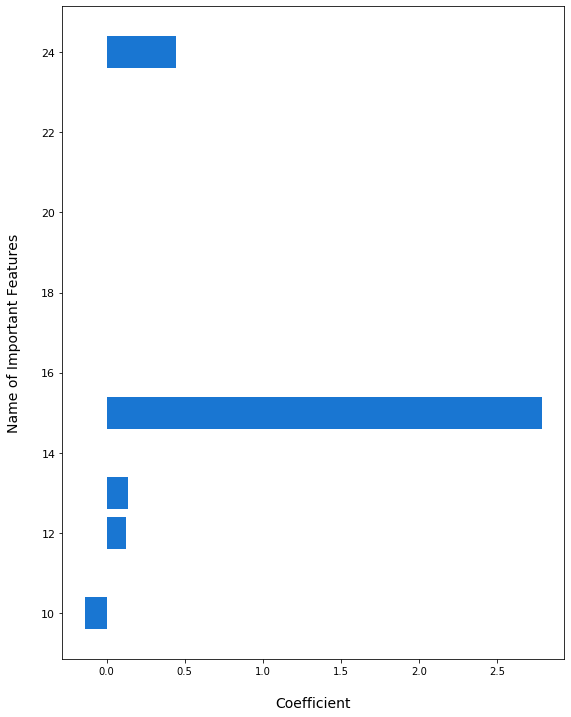

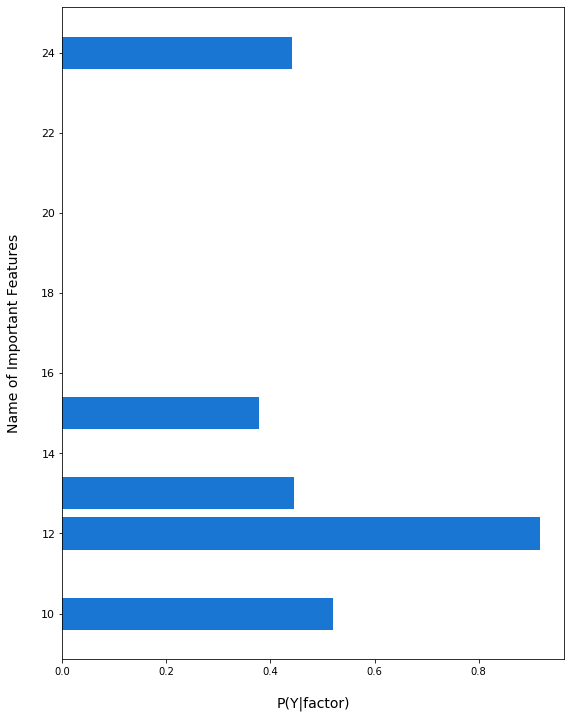

In [36]:
SLR_Selection(X, Y, maximum_feature = 5, solver = 'saga', penalty = 'l1', max_iter = 10000)